In [50]:
# Library
library(dplyr)
library(ggplot2)
library(forecast)
library(lubridate)
library(xts)
library(PerformanceAnalytics)

In [52]:
?AirPassengers
# Monthly Airline Passenger Numbers 1949-1960

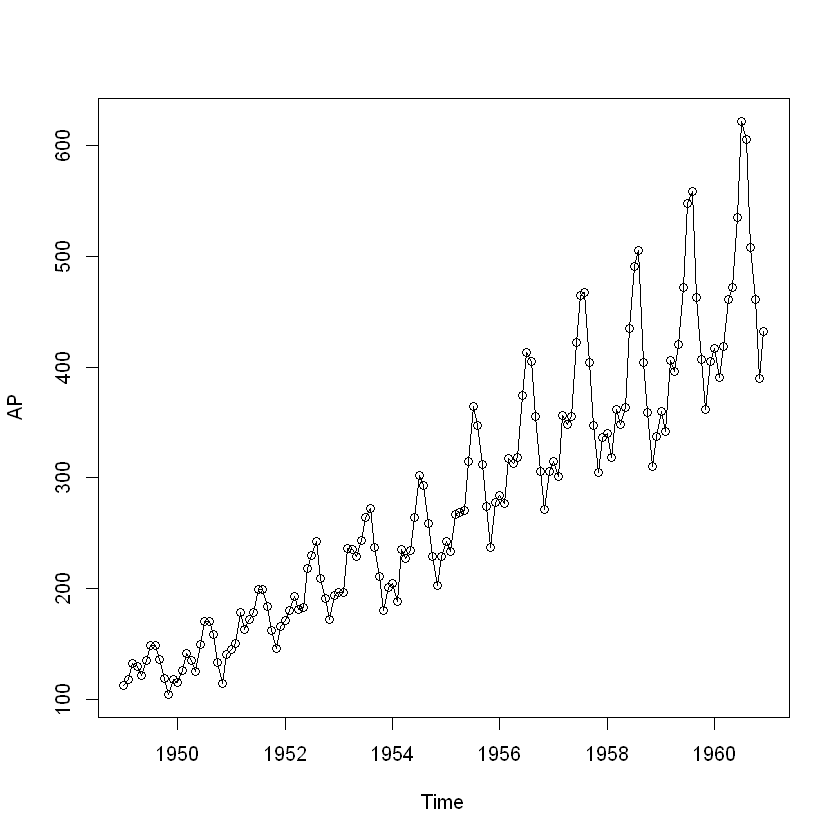

In [34]:
#Time series data & plots
data("AirPassengers")
AP = AirPassengers
plot(AP, type='o')

Seasonality, increasing trend and increasing variability can be observed.

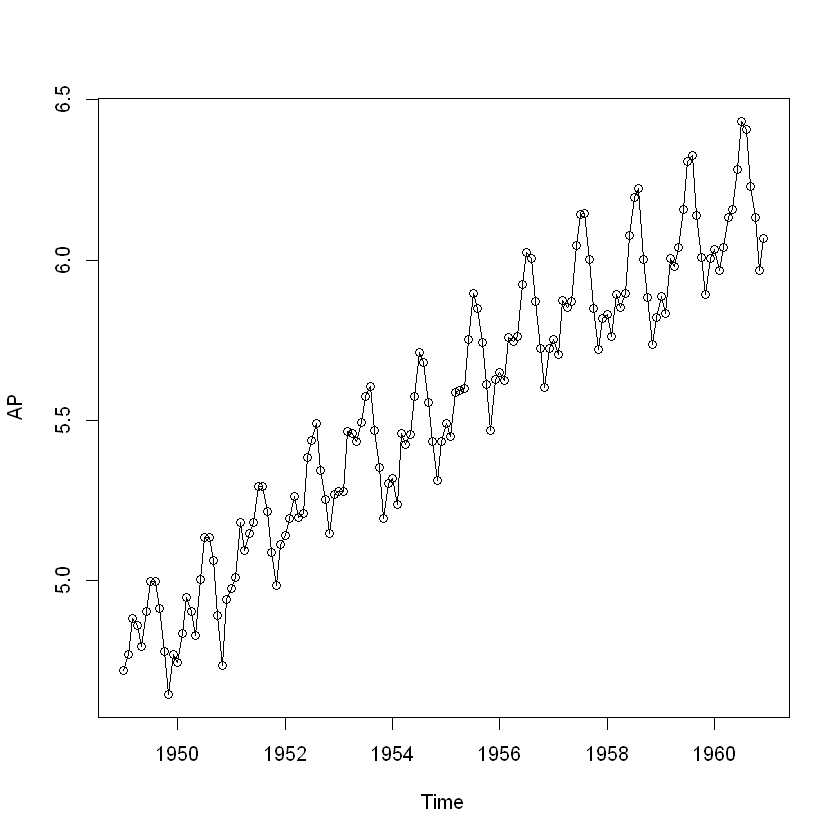

In [35]:
# Log transform the data to tackle increasing variability.
AP <- log(AP)
plot(AP, type='o')


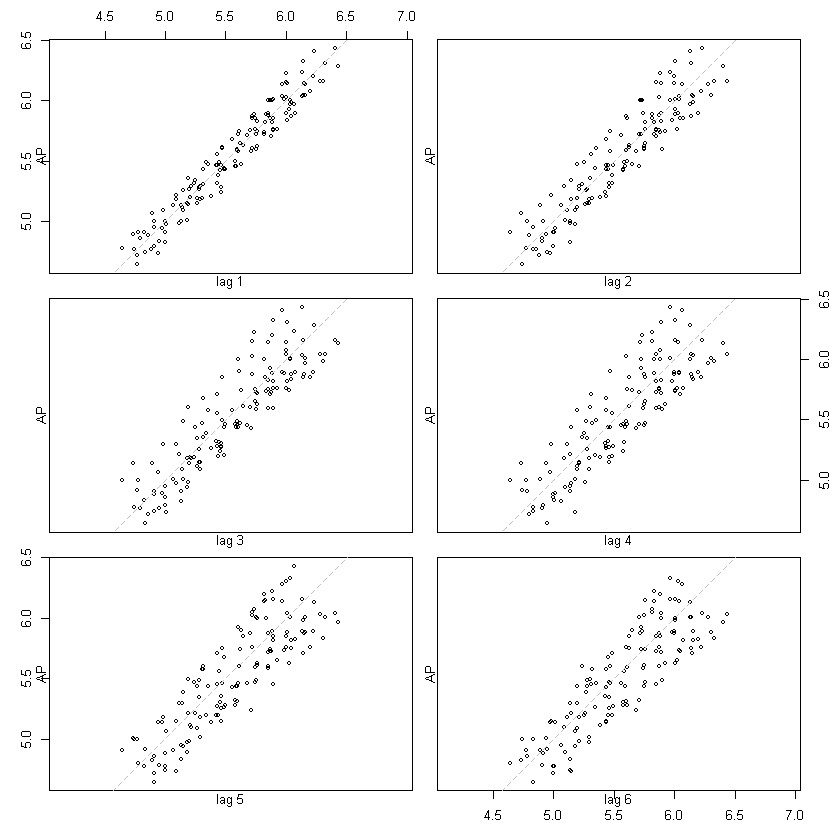

In [36]:
lag.plot(AP, lags=6, do.lines=F)

It can be seen that points are linearly correlated and higher lags have weaker correlation.

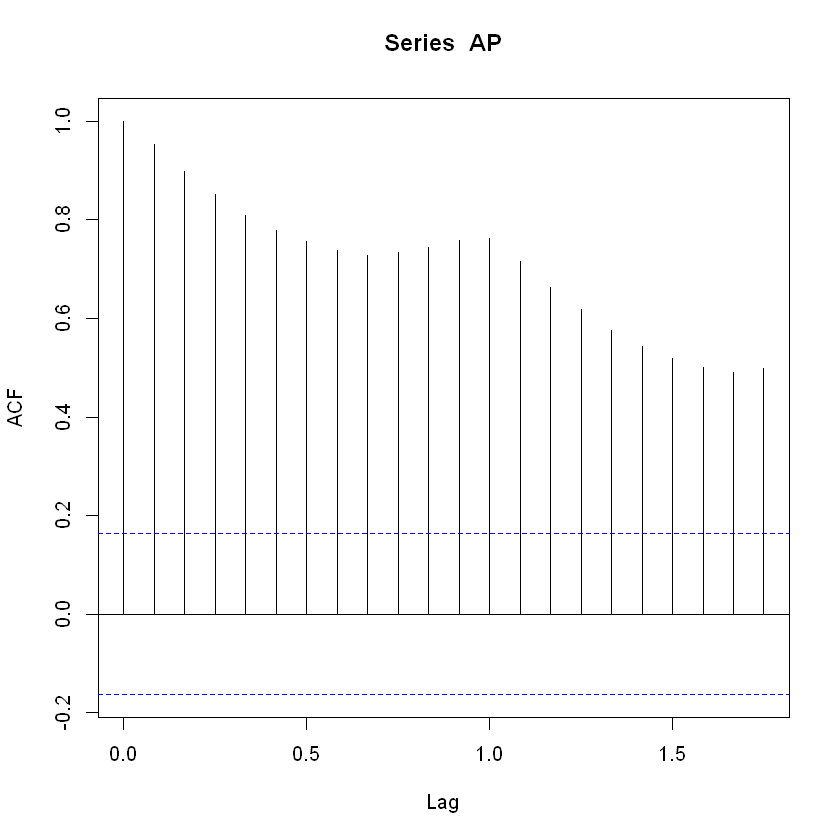

In [37]:
# Autoregression Coefficients

acf(AP)


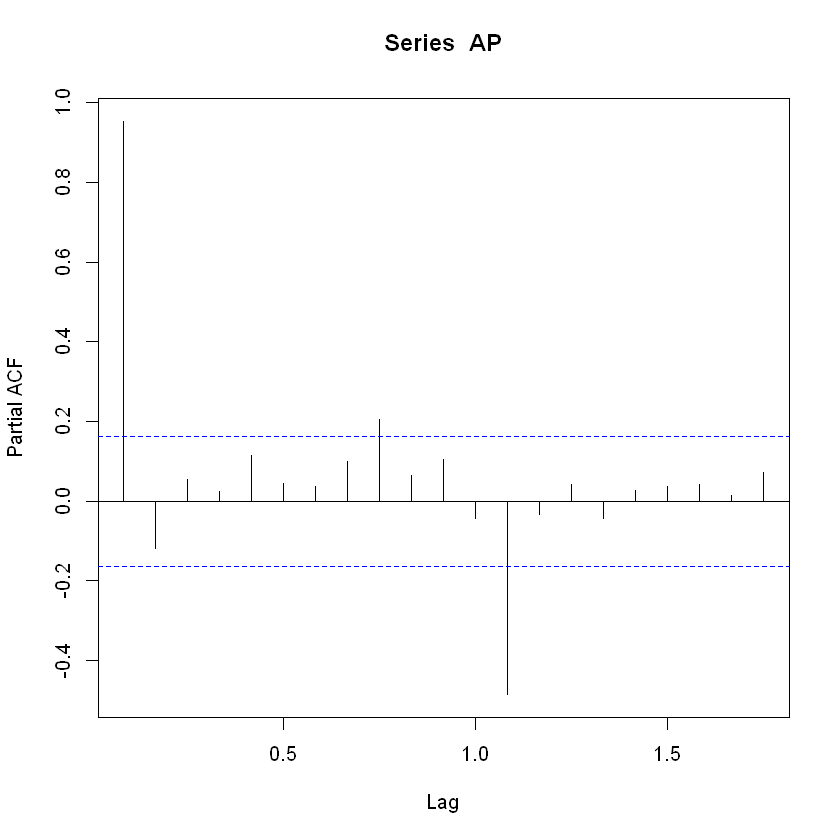

In [38]:
# Partial Autoregression Coefficients
pacf(AP)

Within band : weak correlation/ random variability / white noise

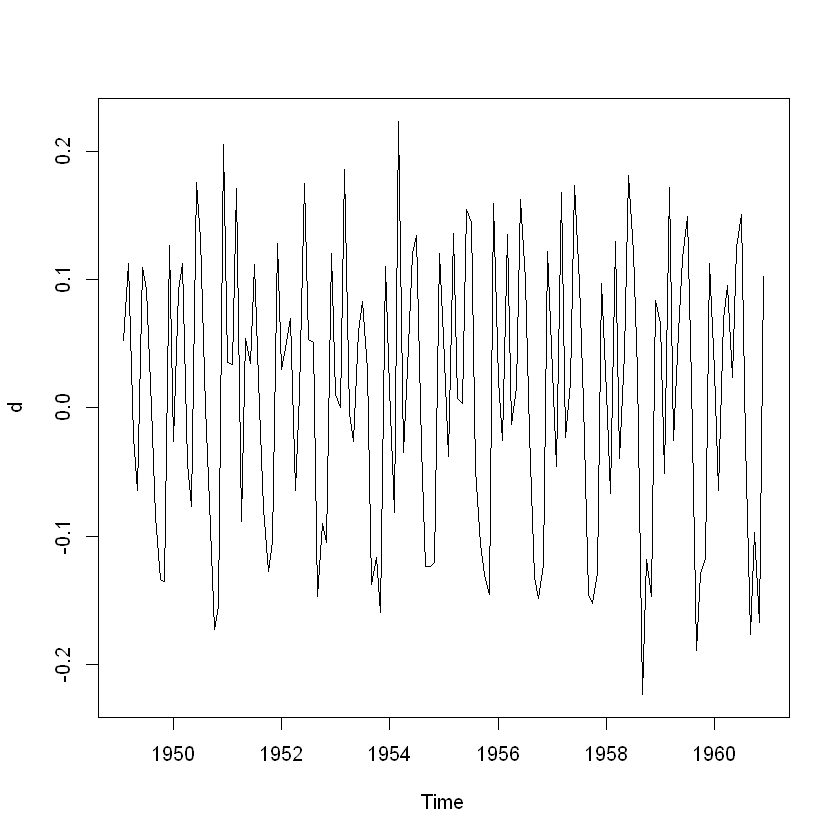

In [39]:
#Differencing : Converting non-stationary time series data into stationary time series data

d = diff(AP)
plot(d)

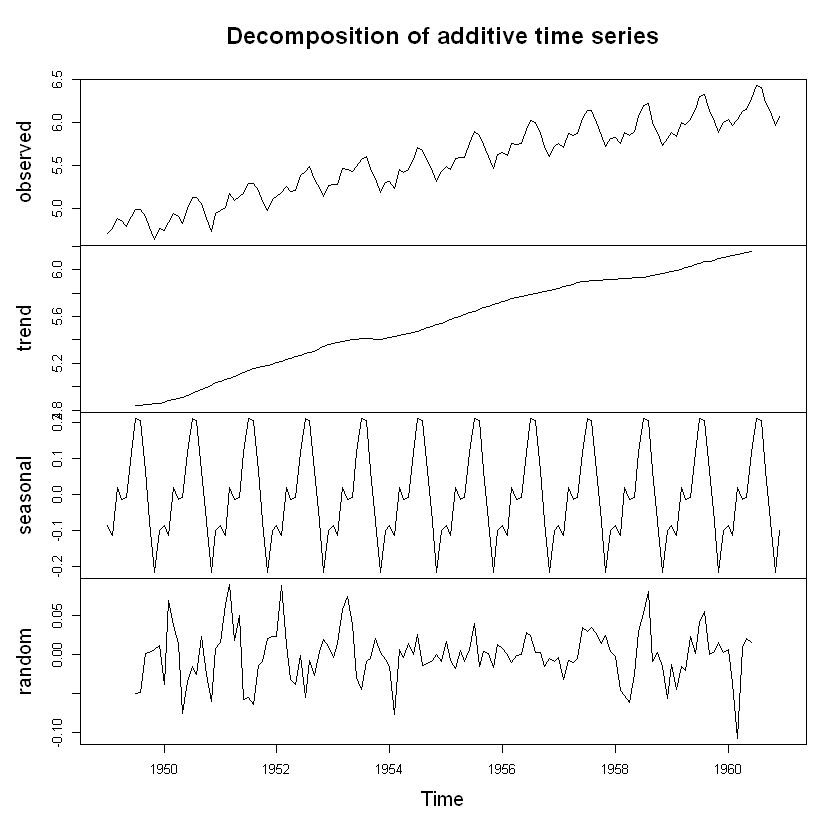

In [40]:
# Decomposition 
decomp = decompose(AP)
plot(decomp)

In [41]:
# ARIMA - Autoregressive Integrated Moving Average

model = auto.arima(AP)
summary(model)

Series: AP 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 estimated as 0.001371:  log likelihood=244.7
AIC=-483.4   AICc=-483.21   BIC=-474.77

Training set error measures:
                       ME       RMSE        MAE        MPE      MAPE      MASE
Training set 0.0005730622 0.03504883 0.02626034 0.01098898 0.4752815 0.2169522
                   ACF1
Training set 0.01443892


In [42]:
attributes(model)

$names
 [1] "coef"      "sigma2"    "var.coef"  "mask"      "loglik"    "aic"      
 [7] "arma"      "residuals" "call"      "series"    "code"      "n.cond"   
[13] "nobs"      "model"     "bic"       "aicc"      "x"         "fitted"   

$class
[1] "forecast_ARIMA" "ARIMA"          "Arima"

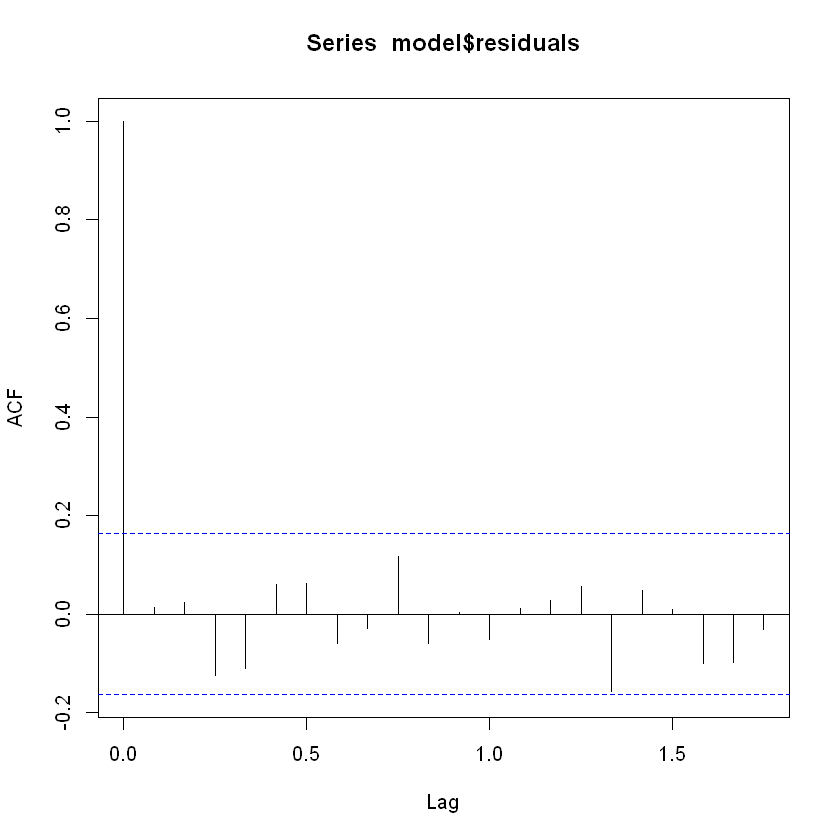

In [43]:
acf(model$residuals)

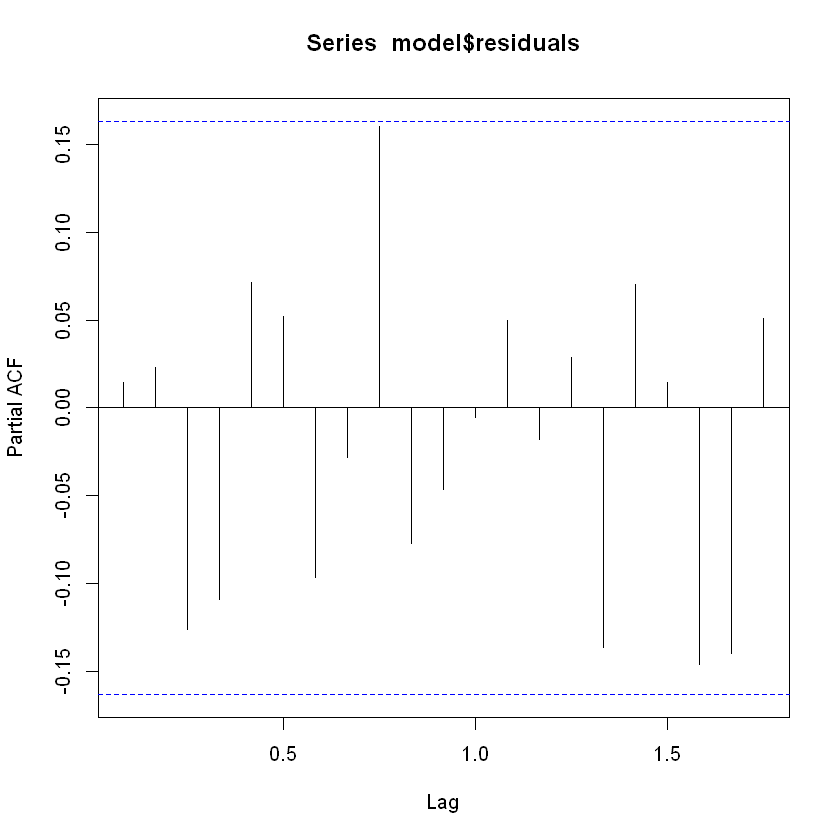

In [44]:

pacf(model$residuals)

Most of the collinearity has been captured into auto arima model

In [45]:
# Box-Ljung test
Box.test(model$residuals, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  model$residuals
X-squared = 17.688, df = 20, p-value = 0.6079


Existance of collinearity is statistically insignificant : must be atleast 95% confident to reject H0

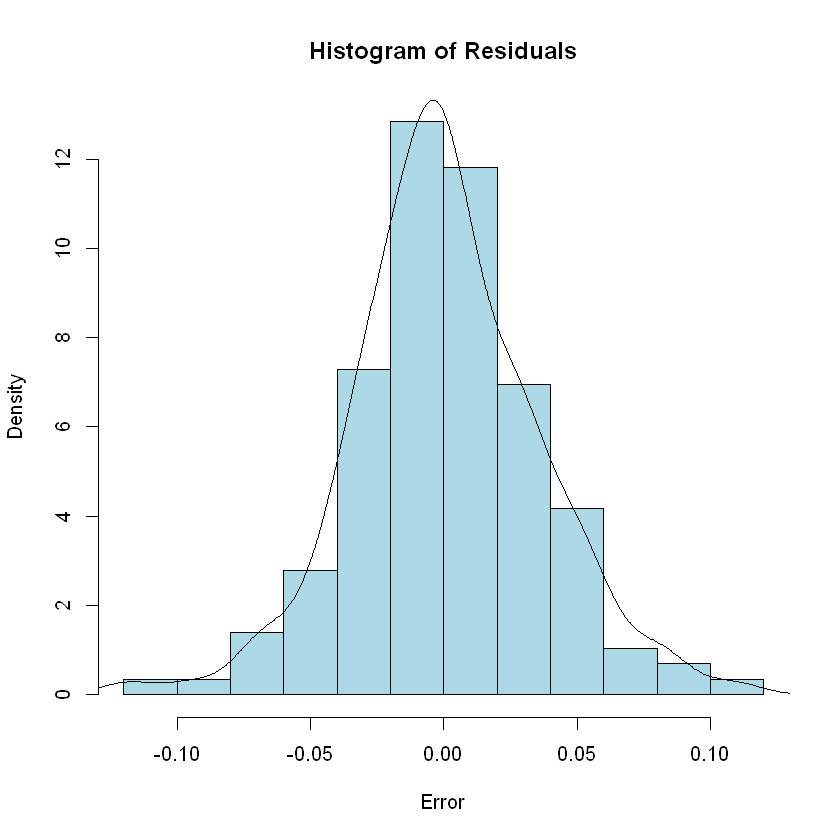

In [46]:
# Residual plot
hist(model$residuals,
     col = "lightblue",
     xlab = "Error",
     main = "Histogram of Residuals",
     freq = FALSE)
lines(density(model$residuals))

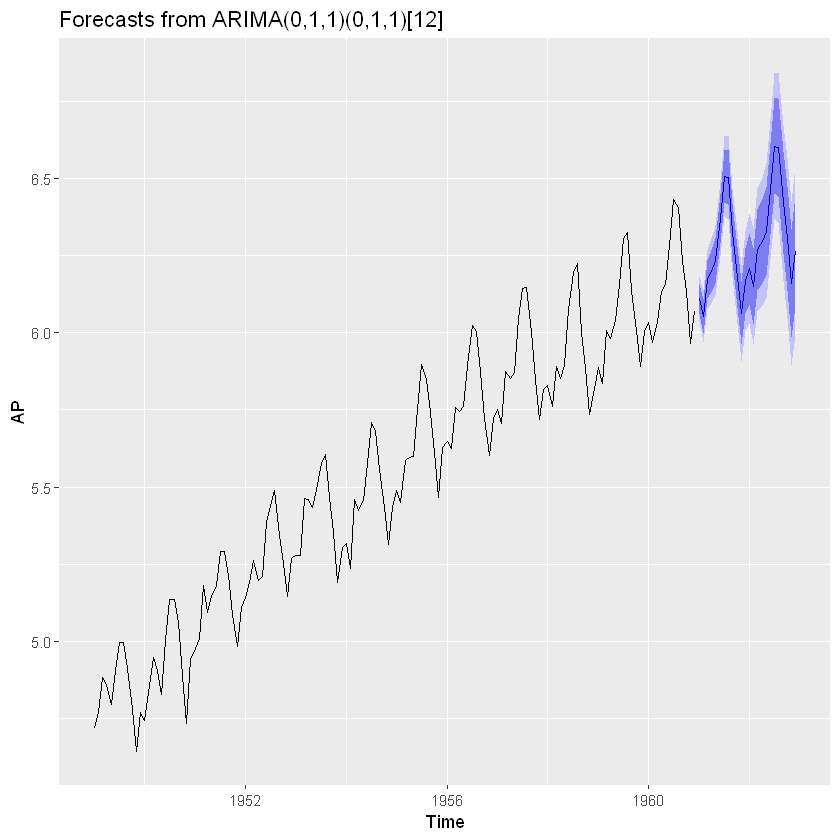

In [47]:
# Forecast for next 24 months
f <- forecast(model, 24)
autoplot(f) 

In [48]:
# Reverting to original data
f$x = exp(f$x)
f$mean = exp(f$mean)
f$lower = exp(f$lower)
f$upper = exp(f$upper)

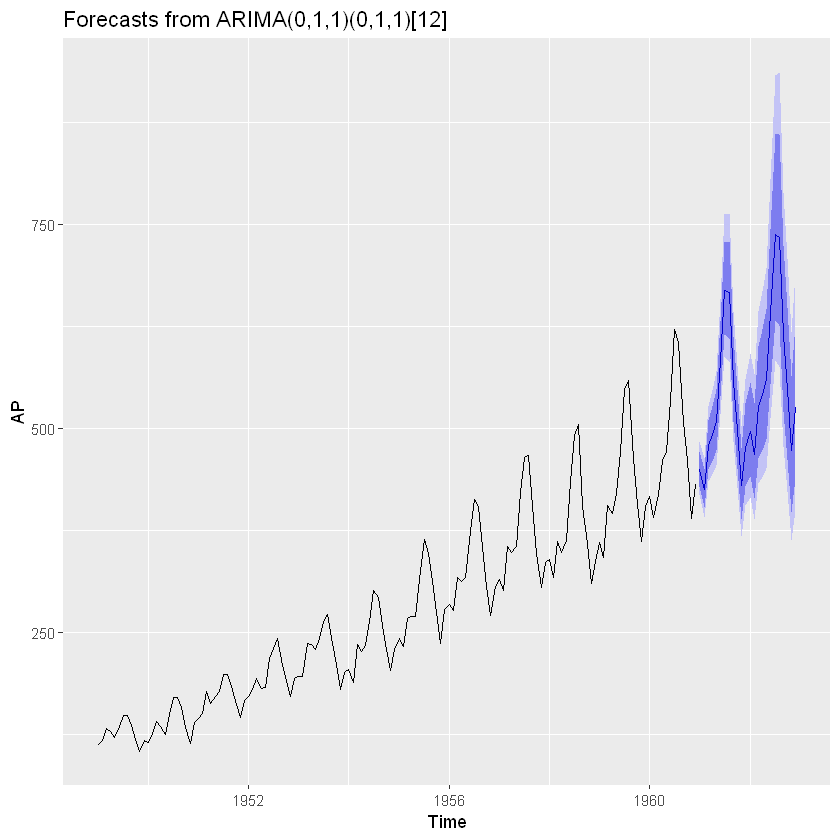

In [49]:

autoplot(f) 

In [51]:
# Forecast for next 24 months in terms of prediction intervals
f

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       450.4224 429.5461 472.3132 418.8895 484.3289
Feb 1961       425.7172 402.8146 449.9219 391.1938 463.2874
Mar 1961       479.0068 450.1386 509.7265 435.5677 526.7781
Apr 1961       492.4045 459.8801 527.2290 443.5416 546.6503
May 1961       509.0550 472.7467 548.1518 454.5866 570.0497
Jun 1961       583.3449 538.8968 631.4591 516.7552 658.5155
Jul 1961       670.0108 615.9149 728.8579 589.0693 762.0740
Aug 1961       667.0776 610.3693 729.0546 582.3280 764.1613
Sep 1961       558.1894 508.4826 612.7552 483.9871 643.7679
Oct 1961       497.2078 451.0221 548.1230 428.3358 577.1537
Nov 1961       429.8720 388.3656 475.8144 368.0412 502.0903
Dec 1961       477.2426 429.4869 530.3083 406.1725 560.7482
Jan 1962       495.9301 441.4199 557.1717 415.0328 592.5957
Feb 1962       468.7289 414.3000 530.3084 388.0942 566.1170
Mar 1962       527.4025 463.0847 600.6535 432.2757 643.4631
Apr 1962       542.1538 473.0479 621.355